In [6]:
import pandas as pd
import json
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns

Search for all json files

In [7]:
files = sorted(glob.glob("extract_*_game*.json"), key=lambda x: int(re.search(r'game(\d+)', x).group(1)))
#glob.glob('...') without re (Regex) import gets stuck at single digit integers, which means 10 and higher is not in there
print(files)

['extract_Tursun_game1.json', 'extract_Tursun_game2.json', 'extract_Tursun_game4.json', 'extract_Tursun_game5.json', 'extract_Tursun_game6.json', 'extract_Tursun_game7.json', 'extract_Tursun_game8.json', 'extract_Tursun_game9.json', 'extract_Tursun_game10.json', 'extract_Tursun_game11.json', 'extract_Tursun_game12.json', 'extract_Tursun_game13.json']


Create Pandas Dataframe

In [9]:
all_rows = []
for file in files:
    with (open(file, "r", encoding="utf-8") as f):
        snapshots = json.load(f)
    for snap in snapshots:
        try:
            activep = snap["data"].get("activePlayer", {})
            allp = snap["data"].get("allPlayers", [])
            cs = activep.get("championStats", {})

            for player in allp:
                is_active = player.get("summonerName") == activep.get(
                    "summonerName")  #True if activeplayer-Name = allplayer-Name
                row = {
                    "file": file,
                    "timestamp": snap["timestamp"],
                    "summonerName": player.get("summonerName"),
                    "assists": player.get("scores", {}).get("assists"),
                    "kills": player.get("scores", {}).get("kills"),
                    "deaths": player.get("scores", {}).get("deaths"),
                    "creepScore": player.get("scores", {}).get("creepScore"),
                    "wardScore": player.get("scores", {}).get("wardScore"),
                    "gold": activep.get("currentGold") if is_active else None,
                    "health": cs.get("currentHealth") if is_active else None,
                    "mana": cs.get("resourceValue") if is_active else None,
                    "moveSpeed": cs.get("moveSpeed") if is_active else None,
                    "level": activep.get("level") if is_active else None
                }

                all_rows.append(row)
        except KeyError as e:
            print(f"Error {e} in {file}")

df = pd.DataFrame(all_rows)

df = df.sort_values(by=["timestamp"], ascending=True)

display(df.head(30))

,file,timestamp,summonerName,assists,kills,deaths,creepScore,wardScore,gold,health,mana,moveSpeed,level
22662,extract_Tursun_game10.json,0.015957,dont peg me#5797,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
22663,extract_Tursun_game10.json,0.015957,Svamm#2527,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
22664,extract_Tursun_game10.json,0.015957,Jumagnus#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
22665,extract_Tursun_game10.json,0.015957,Nøils#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
22666,extract_Tursun_game10.json,0.015957,Rexizz8#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
22667,extract_Tursun_game10.json,0.015957,Bruno1906#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
22668,extract_Tursun_game10.json,0.015957,DAWEEEI#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
22669,extract_Tursun_game10.json,0.015957,ThisNameDidNotFí#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
22672,extract_Tursun_game10.json,0.015957,dont peg me#5797,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
22673,extract_Tursun_game10.json,0.015957,Svamm#2527,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [20]:
filtered_df = df.loc[(df["gold"] != 0) & (df["timestamp"] > 0.1)] # TODO: Count only when game is started --> Find "GameStart"-Event in json
filtered_df = filtered_df.sort_values(by=["timestamp"], ascending=True)
display(filtered_df.head(20))

,file,timestamp,summonerName,assists,kills,deaths,creepScore,wardScore,gold,health,mana,moveSpeed,level
118,extract_Tursun_game1.json,0.450948,ILoveYahooMail32#6165,0,0,0,0,0.0,500.0,590.0,490.0,340.0,1.0
113,extract_Tursun_game1.json,0.450948,Zeratulez#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
112,extract_Tursun_game1.json,0.450948,Thrillillil#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
110,extract_Tursun_game1.json,0.450948,Riona#123,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
119,extract_Tursun_game1.json,0.450948,ThisNameDidNotFí#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
111,extract_Tursun_game1.json,0.450948,DasNoObi#9537,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
114,extract_Tursun_game1.json,0.450948,Rhγa#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
116,extract_Tursun_game1.json,0.450948,sCrapoloviC#EUW,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
117,extract_Tursun_game1.json,0.450948,honor level 9999#9999,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
115,extract_Tursun_game1.json,0.450948,iFresh2#GGGG,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN


Player-gold Prediction

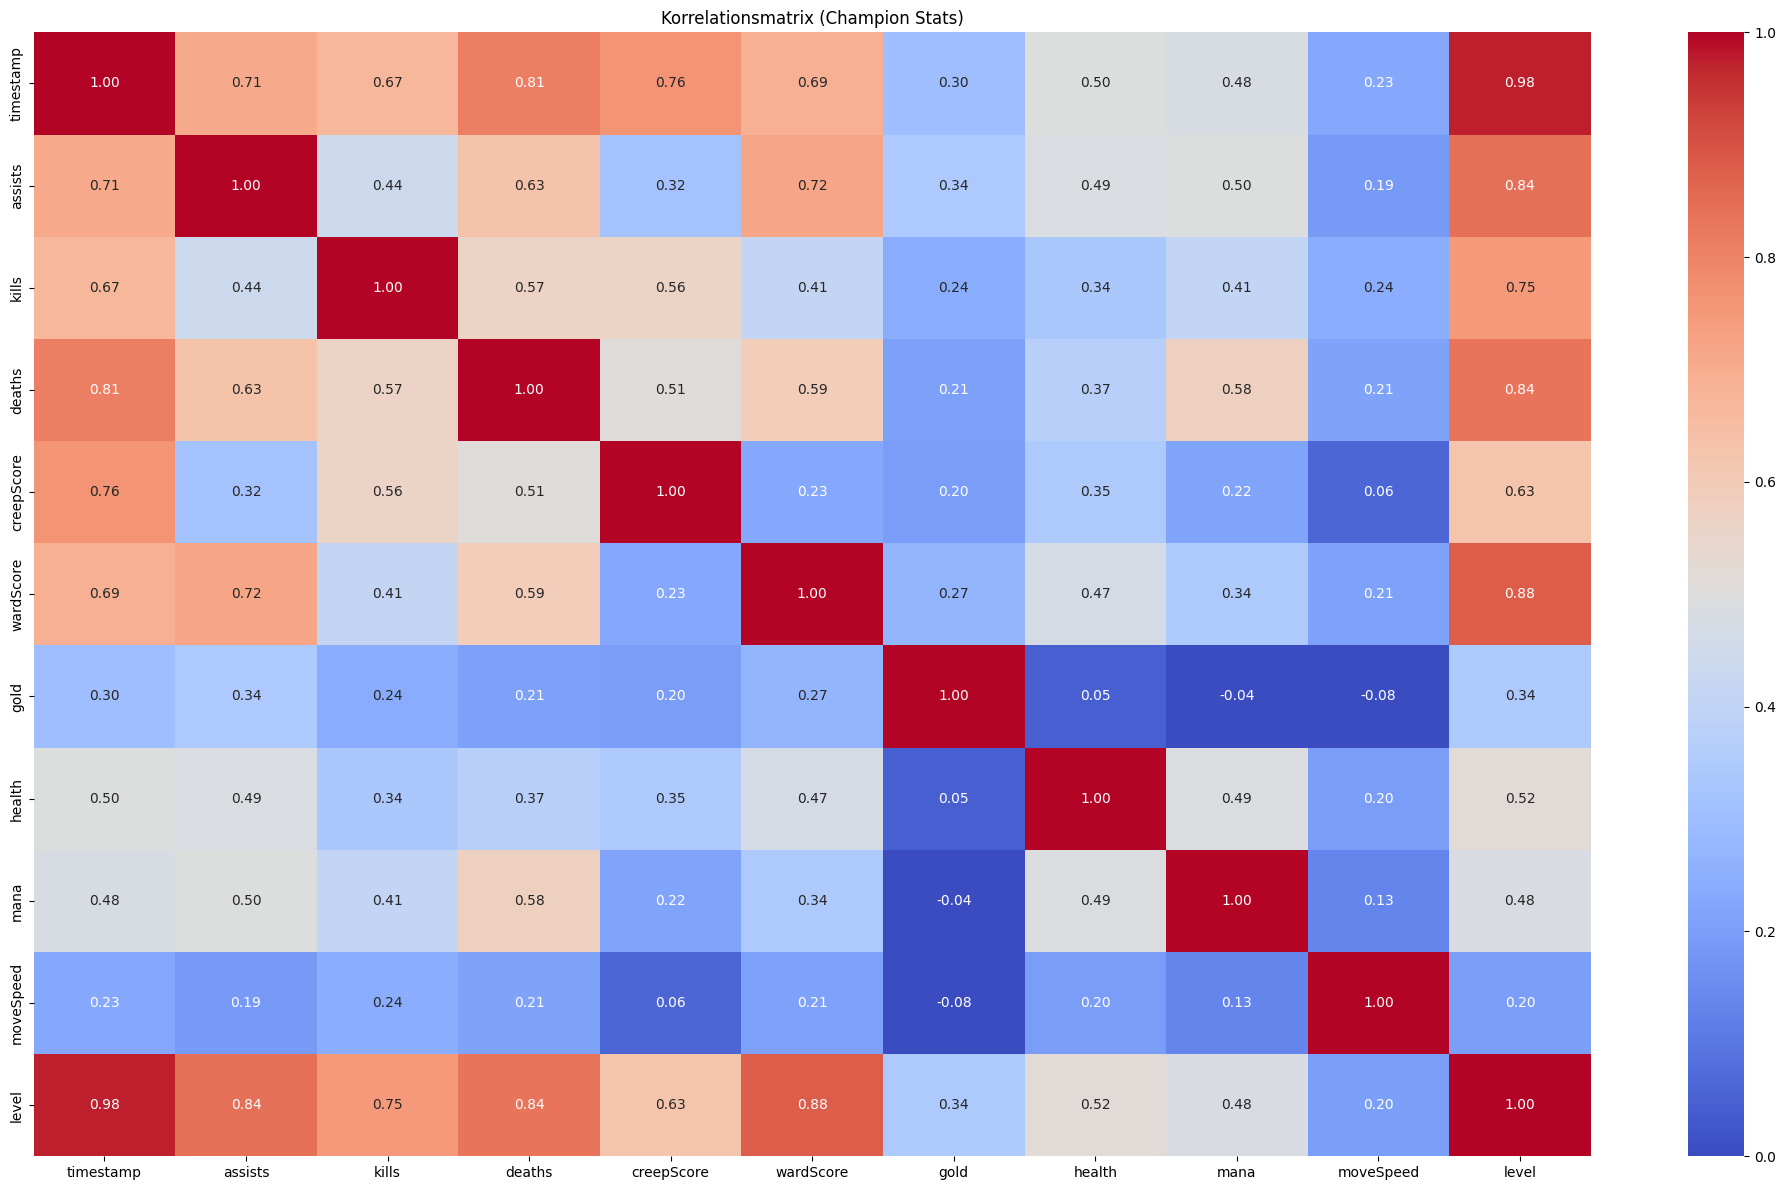

In [16]:
correlation = filtered_df.corr(numeric_only=True)
plt.figure(figsize=(20, 12))
sns.heatmap(correlation,
            annot=True,
            cmap="coolwarm",
            vmin=0,
            vmax=1,
            fmt=".2f",
            cbar=True
            )
plt.title("Korrelationsmatrix (Champion Stats)")
plt.tight_layout()
plt.show()